In [17]:
#Esta linea son unas credenciales para que jupyter pueda leer csv en la nube
#No correeeeeeeeeeeeeeeeeeeeeer


# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='50c1ad4f-7c02-470a-b2e1-f6d4102394f3', project_access_token='p-ac32e08e215e87057a38a4a351d1ab118ee04200')
pc = project.project_context


In [15]:
import pandas as pd
import re
import numpy as np 
import matplotlib.pyplot as plt 
#!pip install seaborn
import seaborn as sns
import string
#!pip install nltk
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [5]:
!nltk.dowload()

/usr/bin/sh: -c: line 1: syntax error: unexpected end of file


In [10]:
df = pd.read_csv('train_tweets.csv',encoding = 'latin',names=["target","id","date","Query","user","tweet"])

FileNotFoundError: File b'train_tweets.csv' does not exist

In [19]:
#NO CORREEEEEEEEEEEEEEEEEEEEEEEEEEER
#Así se importa el csv desde la nube

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_263b769b1a9947b88d2e94d381308cf4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MFEzEH0tYDD3x_2pQNfl7gpDaFB6foX5udpB2ZF5jbzH',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_263b769b1a9947b88d2e94d381308cf4.get_object(Bucket='jupyter-donotdelete-pr-mqnhiq8hhn5zup',Key='train_tweets.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body,encoding = 'latin',names=["target","id","date","Query","user","tweet"])
df.head()



,target,id,date,Query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [20]:
#Todos los tweets los ponemos en minuscula
df.loc[:,'tweet']= df.loc[:,'tweet'].str.lower()

In [21]:
#!pip install stop_words
from stop_words import get_stop_words
from nltk.corpus import stopwords

stop_words = list(get_stop_words('en'))         #About 900 stopwords
#nltk_words = list(stopwords.words('english')) #About 150 stopwords
#stop_words.extend(nltk_words)

print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [23]:
#Partir el dataset
df.head()
df1 = df.loc[:399999,:]
df2 = df.loc[400000:799999,:]
df3 = df.loc[800000:1199999,:]
df4 = df.loc[1200000:,:]
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(400000, 6)
(400000, 6)
(400000, 6)
(400000, 6)


In [24]:
#Metodo que remueve un patrón usado para quitar las menciones @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)    
    return input_txt 

In [25]:
#Se elminan las menciones del dataset
df1.loc[:,'preprocess'] = np.vectorize(remove_pattern)(df1['tweet'], "@[\w]*")

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
df2.loc[:,'preprocess'] = np.vectorize(remove_pattern)(df2['tweet'], "@[\w]*")
df3.loc[:,'preprocess'] = np.vectorize(remove_pattern)(df3['tweet'], "@[\w]*")
df4.loc[:,'preprocess'] = np.vectorize(remove_pattern)(df4['tweet'], "@[\w]*")

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
#Se remueven las url
df1.loc[:,'preprocess'] = df1.loc[:,'preprocess'].str.replace("https\S+|http\S+|www.\S+","",case = False)
#Se remueven los caracteres especiales
df1.loc[:,'preprocess'] = df1.loc[:,'preprocess'].str.replace("[^a-zA-Z'#]"," ")
#Se elminan todas las palabras de stop words
df1.loc[:,'preprocess'] = df1.loc[:,'preprocess'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
#Se remueven las apostrofes
df1.loc[:,'preprocess'] = df1.loc[:,'preprocess'].str.replace("'","")

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
#Se remueven las url
df2.loc[:,'preprocess'] = df2.loc[:,'preprocess'].str.replace("https\S+|http\S+|www.\S+","",case = False)
#Se remueven los caracteres especiales
df2.loc[:,'preprocess'] = df2.loc[:,'preprocess'].str.replace("[^a-zA-Z'#]"," ")
#Se elminan todas las palabras de stop words
df2.loc[:,'preprocess'] = df2.loc[:,'preprocess'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
#Se remueven las apostrofes
df2.loc[:,'preprocess'] = df2.loc[:,'preprocess'].str.replace("'","")

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [29]:
#Se remueven las url
df3.loc[:,'preprocess'] = df3.loc[:,'preprocess'].str.replace("https\S+|http\S+|www.\S+","",case = False)
#Se remueven los caracteres especiales
df3.loc[:,'preprocess'] = df3.loc[:,'preprocess'].str.replace("[^a-zA-Z'#]"," ")
#Se elminan todas las palabras de stop words
df3.loc[:,'preprocess'] = df3.loc[:,'preprocess'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
#Se remueven las apostrofes
df3.loc[:,'preprocess'] = df3.loc[:,'preprocess'].str.replace("'","")

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
#Se remueven las url
df4.loc[:,'preprocess'] = df4.loc[:,'preprocess'].str.replace("https\S+|http\S+|www.\S+","",case = False)
#Se remueven los caracteres especiales
df4.loc[:,'preprocess'] = df4.loc[:,'preprocess'].str.replace("[^a-zA-Z'#]"," ")
#Se elminan todas las palabras de stop words
df4.loc[:,'preprocess'] = df4.loc[:,'preprocess'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
#Se remueven las apostrofes
df4.loc[:,'preprocess'] = df4.loc[:,'preprocess'].str.replace("'","")

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
#Se reconstruye todo el dataset
frames = [df1,df2,df3,df4]
df_total = pd.concat(frames)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
target        1600000 non-null int64
id            1600000 non-null int64
date          1600000 non-null object
Query         1600000 non-null object
user          1600000 non-null object
tweet         1600000 non-null object
preprocess    1600000 non-null object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


In [33]:
df_total.loc[800000:,"target"]= 1
df_total

,target,id,date,Query,user,tweet,preprocess
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t...",awww bummer shoulda got david carr third day d
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...,dived many times ball managed save rest go bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving mad see
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@kwesidei not the whole crew,whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need a hug,need hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@loltrish hey long time no see! yes.. rains a...,hey long time see yes rains bit bit lol fine t...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@tatiana_k nope they didn't have it,nope
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que muera


# Red Neuronal Recurrente

In [34]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist

In [35]:
import keras 

In [36]:
#Sequential es la librería usada para crear una red neuronal en keras
from keras.models import Sequential 

#Dense es una capa que se conecta totalmente con las neuronas de la capa anterior
from keras.layers import Dense

"""GRU es un tipo de neurona que permite procesar información y pasa 
a las neuronas posteriores los datos que obtiene, de este modo las
otras capas pueden hacer asociaciones entre palabras seguidas"""
from keras.layers import GRU

"""Embedding es un tipo de capa que reduce la dimensionalidad del 
dataset, ya que cada atributo le da una dimensión adicional el model, 
esta capa asocia palabras similares y las coloca en puntos cercanos del espacio,
un ejemplo de esto son palabras como good y great"""
from keras.layers import Embedding

#Adam es un optimizador usado para que la red se entrene
from keras.optimizers import Adam

#Tokenizer sirve para convertir palabras a numeros
from keras.preprocessing.text import Tokenizer

#Pad_sequences sirve para poner todos los tweets de la misma dimensión
from keras.preprocessing.sequence import pad_sequences

In [37]:
#Numero de palabras a usar
num_words = 10000

In [38]:
#Inicializamos el tokenizer con el numero de palabras
tokenizer = Tokenizer(num_words=num_words)

In [39]:
%%time
#Se tokenizan todos los tweets
tokenizer.fit_on_texts(df_total['preprocess'])

CPU times: user 23.2 s, sys: 48 ms, total: 23.2 s
Wall time: 23.3 s


In [37]:
#Con este comando vemos la equivalencia palabra-numero
#A cada palabra se le asigna un número único
tokenizer.word_index

{'flickit': 116514,
 'wassoufbook': 196433,
 'francyne': 270235,
 'iampritty': 184754,
 'vapour': 68108,
 'interessant': 60251,
 'asbury': 28810,
 'nlu': 106296,
 'sustnow': 117281,
 'coiled': 262691,
 'eeeww': 40408,
 'lincons': 235805,
 'mojonaa': 224883,
 'charlieissocoollike': 66419,
 'lifeblood': 101850,
 'podginess': 264731,
 'tbm': 31127,
 'patooties': 233598,
 'obviousmoviereference': 219381,
 'ghats': 160111,
 'dowld': 270144,
 'resession': 162561,
 'jaymeee': 190353,
 'aahhaha': 245125,
 'wickie': 240649,
 'king': 1578,
 'uai': 53240,
 'doooood': 83513,
 'lfh': 264443,
 'horeee': 69304,
 'vegasmonster': 253555,
 'yourfavoritecobra': 234731,
 'credits': 6473,
 'brandishes': 260954,
 'hannahhh': 198549,
 'bneran': 158842,
 'tireedd': 55795,
 'telefonmarketing': 178743,
 'hypochindriac': 178972,
 'xico': 21885,
 'lifes': 2749,
 'repetivly': 133551,
 'lagee': 136042,
 'smokinnn': 245186,
 'avarice': 129040,
 'specd': 209523,
 'digresses': 130442,
 'sdnevent': 182000,
 'mfrs': 101

In [40]:
#Separamos el dataset en entrenamiento y test
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(df_total['preprocess'], df_total['target'], random_state=42, test_size=0.3)


In [41]:
#Extraemos los tokens de los datos de entrenamiento
X_train_tokens = tokenizer.texts_to_sequences(X_train_text)

In [42]:
#Dato normal
X_train_text[1]

'upset update facebook texting might cry result school today also blah'

In [44]:
#Dato tokenizado (importante ver que no todas las palabras tienen token
#un token, ya que solo elegimos 10000)
np.array(X_train_tokens[1])

array([ 134, 1195,  260, 3704,  487, 2114,  592, 1277])

In [45]:
#Extraemos los tokens de test
X_test_tokens = tokenizer.texts_to_sequences(X_test_text)


### Hallando el número de tokens adecuado

Al momento de entrenar una red neuronal todas las entradas deben tener la misma forma, de momento ese no es el caso ya que algunos tweets tienen pocas palabras mientras que otros tienen muchas.

Una solución a esto es basandonos en la cantidad media de tokens, y en su desviación estandar, hallar un número de tokens fijo y llevar todos los tweets a esta cantidad. Los tweets que tengan menos de esa cantidad, se rellenaran con 0 en las posiciones que falten, y los tweets que tengan más de esa cantidad se le eliminaran los sobrantes, en este ultimo caso es importante especificar si se borraran los primeros o los ultimos tokens.


In [46]:
#Contamos los tokens que tiene cada tweet
num_tokens = [len(tokens) for tokens in X_train_tokens + X_test_tokens]
num_tokens = np.array(num_tokens)


array([18,  8,  8, ...,  7, 11,  3])

In [47]:
#Cantidad media de tokens por tweets
np.mean(num_tokens)

6.5506650000000004

In [67]:
#Cantidad máxima de tokens en un tweet
np.max(num_tokens)

48

In [68]:
#Numero de tokens promedio, más 2 desvaciones estandar
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

14

In [69]:
#Usando max tokens se mantiene este porcentaje de la información
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.95266437500000001

In [70]:
#Pad pre hace que los tokens faltantes se coloquen antes
#También hace que los tokens sobrantes se eliminen del inicio
pad = 'pre'

In [71]:
#Realizamos el padding a los datos de entrenamiento
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)

In [72]:
#Realizamos el padding a los datos de test
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_tokens,
                           padding=pad, truncating=pad)

In [73]:
#Vemos la forma de los vectores
X_test_pad.shape

(480000, 14)

In [75]:
#Ejemplo del padding de un registro
X_train_pad[1]

array([   0,    0,    0,    0,    0,    0,  134, 1195,  260, 3704,  487,
       2114,  592, 1277], dtype=int32)

# # Creando la red neuronal recurrente

In [84]:
#Creamos el modelo de tipo sequential
model = Sequential()

In [85]:
#Capa de embedding para reducir la dimensionalidad de los datos
embedding_size = 8
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='layer_embedding'))

In [86]:
#Primera red neuronal 
model.add(GRU(units=16, return_sequences=True))

In [87]:
model.add(GRU(units=8, return_sequences=True))

In [88]:
model.add(GRU(units=4))

In [89]:
model.add(Dense(1, activation='sigmoid'))

In [90]:
optimizer = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 14, 8)             80000     
_________________________________________________________________
gru_2 (GRU)                  (None, 14, 16)            1200      
_________________________________________________________________
gru_3 (GRU)                  (None, 14, 8)             600       
_________________________________________________________________
gru_4 (GRU)                  (None, 4)                 156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 81,961
Trainable params: 81,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
model.fit(X_train_pad, y_train,
          validation_split=0.05, epochs=3, batch_size=64)

Train on 1064000 samples, validate on 56000 samples
Epoch 1/3
1064000/1064000 [==============================] - 1307s 1ms/step - loss: 0.4761 - acc: 0.7704 - val_loss: 0.4619 - val_acc: 0.7803
Epoch 2/3
1064000/1064000 [==============================] - 1311s 1ms/step - loss: 0.4516 - acc: 0.7851 - val_loss: 0.4569 - val_acc: 0.7830
Epoch 3/3
  16960/1064000 [..............................] - ETA: 21:10 - loss: 0.4340 - acc: 0.7935

# Regresión lineal con el bag of words

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df_total['preprocess'])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


# splitting data into training and test set
xtrain_bow, xtest_bow, ytrain, ytest = train_test_split(bow, df_total['target'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xtest_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(ytest, prediction_int) # calculating f1 score

0.74844473124350919

In [37]:
!pip install wordcloud

    100% |████████████████████████████████| 358kB 2.6MB/s eta 0:00:01
Requirement not upgraded as not directly required: numpy>=1.6.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: pillow in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: olefile in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pillow->wordcloud)


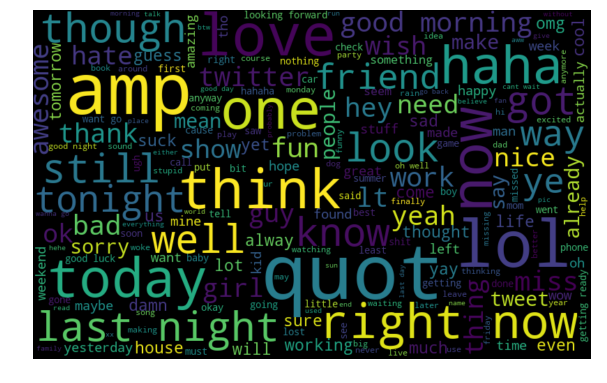

In [39]:
from wordcloud import WordCloud

normal_words =' '.join([text for text in df_total.loc[:,'preprocess']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

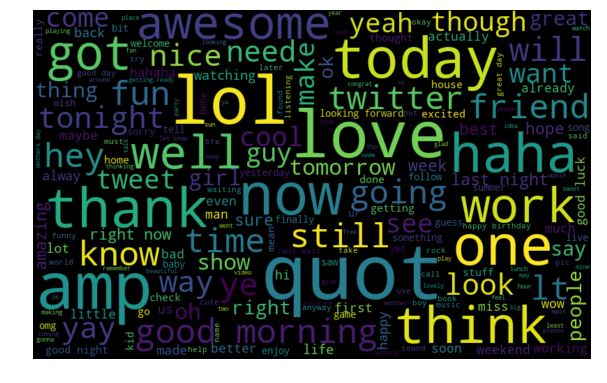

In [40]:
normal_words =' '.join([text for text in df_total.loc[:,'preprocess'][df_total['target'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()